# خلاصه ای از مسیر 
## کارهایی که با داده انجام شد
- ساختن یک ستون جدید به عنوان قیمت با ضرب کردن مقدار کمیت با قیمت واحد
- حذف ۵ هفته اول به خاطر وجود هفته بدون درآمد در هفته ۵ام برای آسانتر شدن مدل
- داده ها از جمع روزانه به جمع درآمد در هفته و ماه تبدیل شد و جمع درآمد در هفته پذیرفته شد با توجه نمودار های خودهمبستگی و  خودهمبستگی جزئی آنها
- تبدیل دیتای روزانه به دیتای روزانه با میانگین متحرک

## تست هایی که گرفته شد
- دیکی-فولر برای نشان دادن مانایی داده

## مشکلاتی که به وجود آمد
- مدل کم برازش شد با وجود اینکه ارورهایی ما پایین بود ولی مدل بسیار بد پیش بینی می کرد به طوری که یک خط ثابت را پیش بینی میکرد
- برای حل مشکل بالا بر روی داده روزانه تمرکز پیدا کردیم و مشکل خیلی راحت تر از قبل حل شد




برای اطلاعات بیشتر به فایل پی دی اف همراه مراجعه کنید.

# وارد کردن کتابخانه ها و فایل اکسل داده

In [72]:
# وارد کردن کتابخانه های مورد نیاز

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import seasonal_plot , month_plot , plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima , model_selection , ARIMA 
from sklearn.metrics import mean_absolute_percentage_error , mean_squared_error , mean_absolute_error , root_mean_squared_error
from sklearn.model_selection import ParameterGrid , TimeSeriesSplit
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.statespace.sarimax import SARIMAX


import warnings
warnings.filterwarnings("ignore", message=".*force_all_finite.*")
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
# خواندن فایل اکسل 
df = pd.read_excel('Online_Retail.xlsx' , parse_dates=True , index_col='InvoiceDate')
df.head()

# تحلیل اکتشافی داده

In [ ]:
# ساختن ستون جدید به نام قیمت 
df['Price'] = df['Quantity'] * df['UnitPrice']
df.head()

In [ ]:
daily_sales = df['Price'].resample('D').sum()
weekly_sales = df['Price'].resample('W').sum()
monthly_sales = df['Price'].resample('M').sum()

plt.plot(daily_sales , label='Daily Sales')
plt.plot(weekly_sales , label = 'Weekly Sales')
plt.plot(monthly_sales , label = 'Monthly Sales')
plt.legend()
plt.figure(figsize=(10,15))
plt.show()

In [ ]:
plt.plot(weekly_sales , label = 'Weekly Sales')
plt.legend()
plt.figure(figsize=(10,15))
plt.show()

In [ ]:
dec = seasonal_decompose(weekly_sales , period=12)
fig = dec.plot()
fig.set_size_inches(30,17)
plt.show()

In [ ]:
plot_acf(monthly_sales)
plot_pacf(monthly_sales , lags=min(5, len(monthly_sales)//2 - 1))
plt.show()

In [ ]:
plot_acf(weekly_sales , lags=40) 
plot_pacf(weekly_sales)
plt.show()

In [ ]:
plt.plot(weekly_sales , label = 'Weekly Sales')
plt.legend()
plt.figure(figsize=(10,15))
plt.show()

In [ ]:
model_arima_diff = auto_arima(train_diff['log_diff_price'], seasonal=False)
print(model_arima_diff.summary())

In [ ]:
pred = model_arima_diff.predict()

In [ ]:
train_diff['log_diff_price_exp'] = np.exp(train_diff['log_diff_price'])
test_diff['log_diff_price_exp'] = np.exp(test_diff['log_diff_price'])
pred_exp = np.exp(pred)

In [ ]:
plt.plot(train_diff['log_diff_price_exp'] , label='train')
plt.plot(test_diff['log_diff_price_exp'] , label='test')
plt.plot(pred_exp , label = 'prediction')
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [ ]:
test_diff

In [ ]:
plt.plot(test_diff['log_diff_price_exp'] , label='test')
plt.plot(pred_exp , label = 'prediction')
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [ ]:
print(f"MAE  : {mean_absolute_error(test_diff['log_diff_price_exp'], pred_exp):.2f}")
print(f"MSE  : {mean_squared_error(test_diff['log_diff_price_exp'], pred_exp):.2f}")
print(f"RMSE : {mean_squared_error(test_diff['log_diff_price_exp'], pred_exp):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(test_diff['log_diff_price_exp'], pred_exp):.2f}%")

# Parameter Tuning :
## انتخاب بهترین مدل

  

In [ ]:
# param_grid = {
#     'p': [0, 1, 2],
#     'd': [0, 1],
#     'q': [0, 1, 2],
#     'P': [0, 1],
#     'D': [0],
#     'Q': [0,1],
#     'm': [7,12] 
# }
# grid = ParameterGrid(param_grid)


# rmse_list = []

# for i in grid:
#     model_cv = ARIMA(order=(i['p'] , i['d'] , i['q']) , seasonal_order=(i['P'] , i['D'] , i['Q'] , i['m']))
    
#     CV = model_selection.RollingForecastCV(h = 4 , step=1 , initial = int(0.4 * len(train_diff)))
    
#     cv_score = model_selection.cross_val_score(model_cv , 
#                                               y = train_diff['log_diff_price']  ,
#                                               scoring='mean_squared_error'
#                                               ,cv=CV , error_score=1000000)
    
#     rmse = np.sqrt(np.average(cv_score))
#     rmse_list.append(rmse)

In [ ]:
min(rmse_list)

In [ ]:
best_params = grid[np.argmin(rmse_list)]
best_params

In [ ]:
train_diff

In [ ]:
model_tuned = ARIMA(order=(0,0,1) , seasonal_order=(0,0,0,12)).fit(train_diff)

In [ ]:
pred_tuned = model_tuned.predict(period)

In [ ]:
plt.plot(test_diff , label='test')
plt.plot(pred_tuned , label = 'prediction')
plt.xticks(rotation = 30)
plt.legend()

In [ ]:
print(f"MAE  : {mean_absolute_error(test_diff, pred_tuned):.2f}")
print(f"MSE  : {mean_squared_error(test_diff, pred_tuned):.2f}")
print(f"RMSE : {mean_squared_error(test_diff, pred_tuned):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(test_diff, pred_tuned):.2f}%")

# میانگین متحرک روی داده روزانه
- به این دلیل که داده های روزانه دارای نویز زیاد بود تصمیم بر این شد که دیتای روزانه را کمی قابل درک تر کنیم

In [24]:
daily_rolling = daily_sales.rolling(window=12).mean()
daily_rolling.dropna(inplace=True)

In [25]:
len(daily_rolling)

363

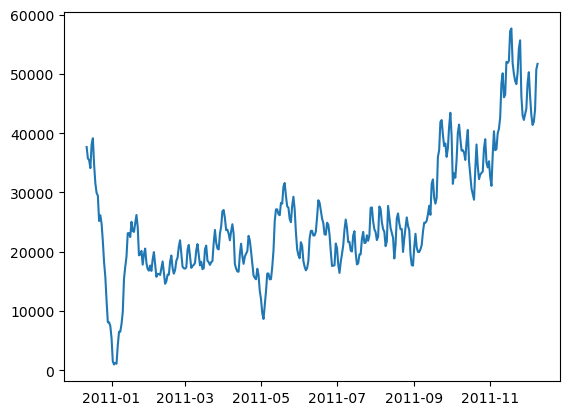

In [26]:
plt.plot(daily_rolling)
plt.show()

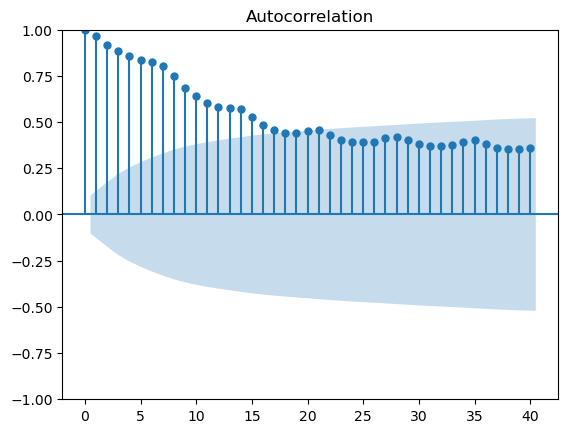

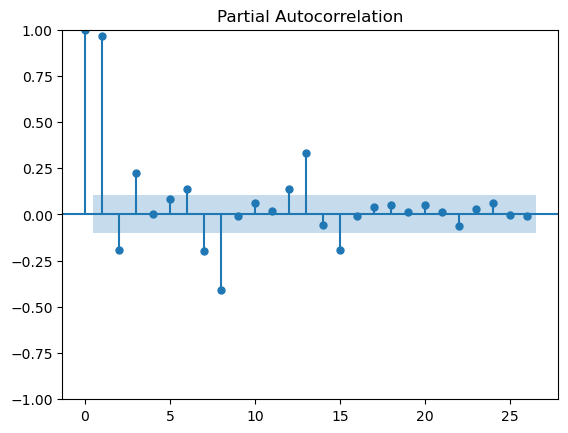

In [27]:
plot_acf(daily_rolling , lags=40) 
plot_pacf(daily_rolling) # p = 1
plt.show() 

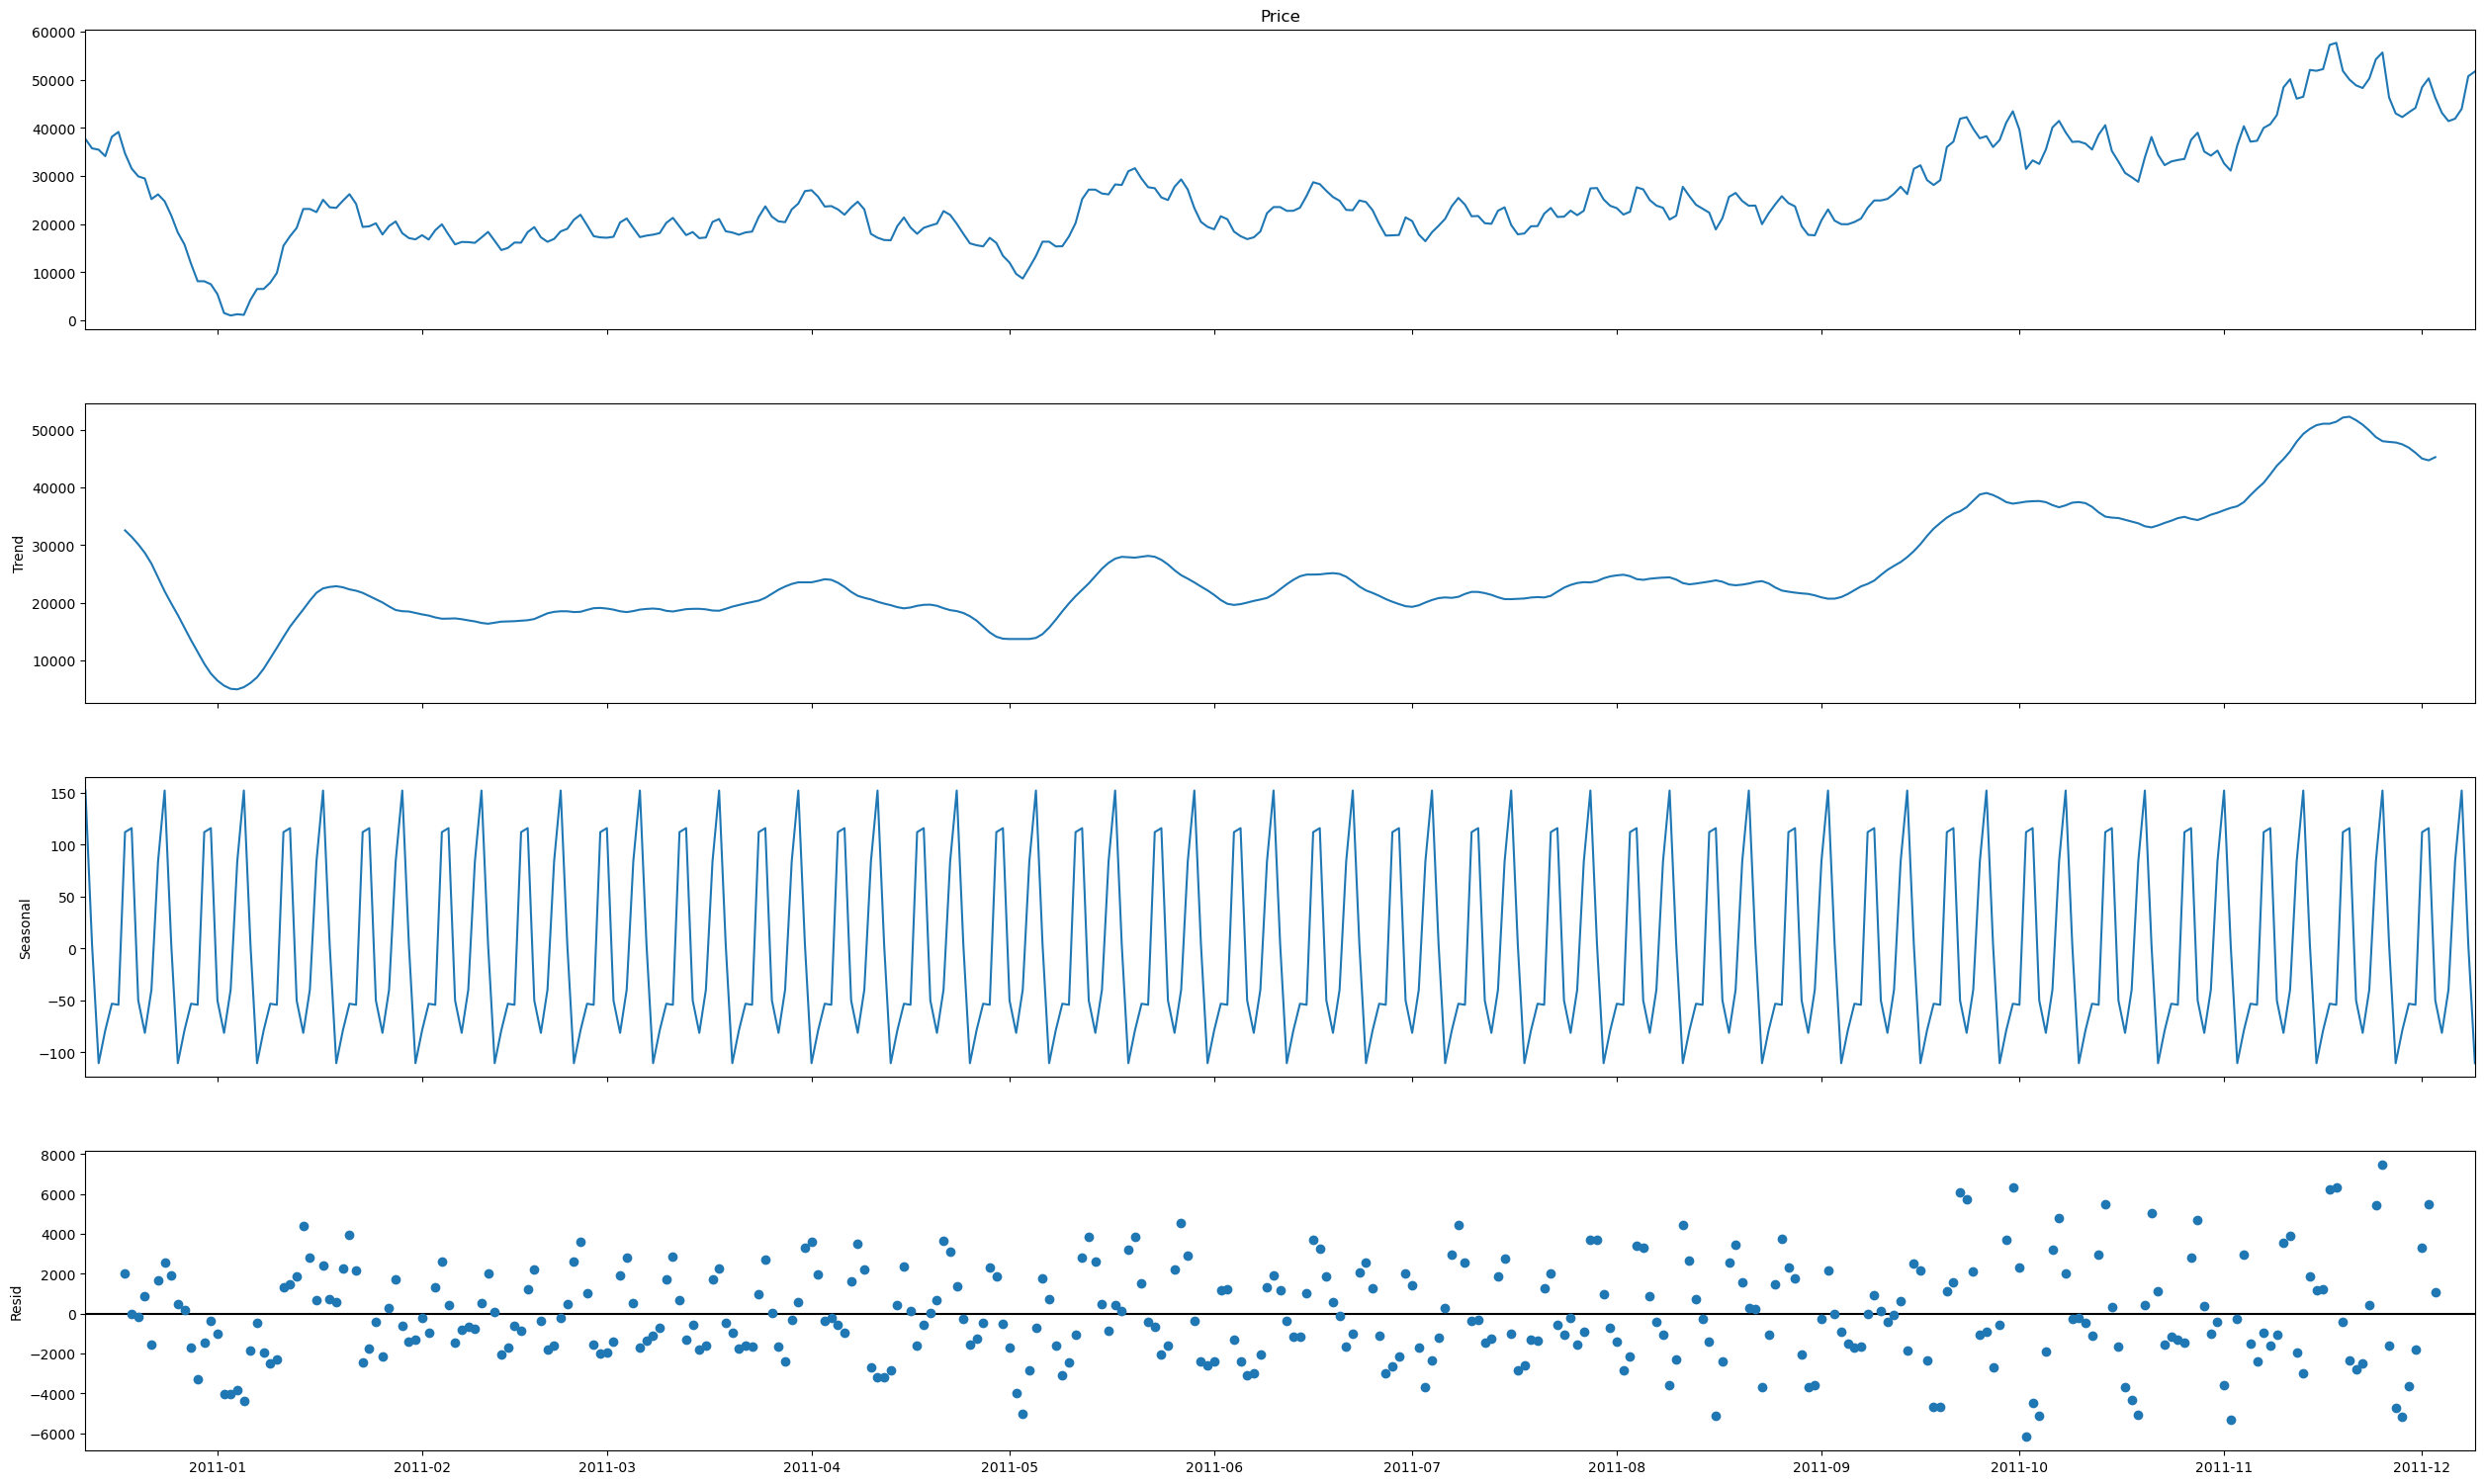

In [28]:
dec = seasonal_decompose(daily_rolling , period=12)
fig = dec.plot()
fig.set_size_inches(30,17)
plt.show()

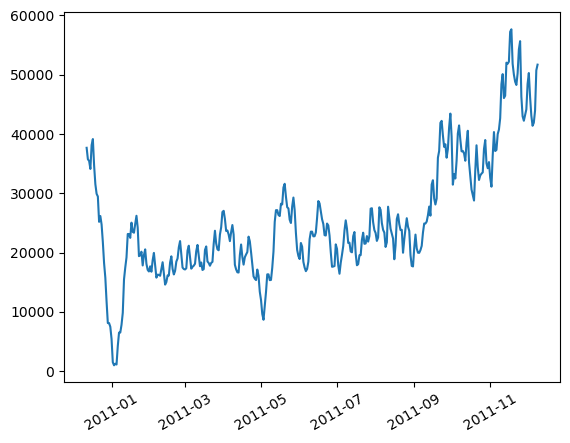

In [29]:
plt.plot(daily_rolling)
plt.xticks(rotation=30)
plt.show()

In [30]:
result = adfuller(daily_rolling)
print(f'P_value : {result[1]}')
if result[1] > 0.05:
    print('تست نشان میده که داده های مانا نیستند')
else:
    print('داده ها مانا هستند')

P_value : 0.9102068703433419
تست نشان میده که داده های مانا نیستند


In [31]:
daily_rolling_log = np.log(daily_rolling)
daily_rolling_log_diff = daily_rolling_log.diff()
daily_rolling_log_diff.dropna(inplace=True)

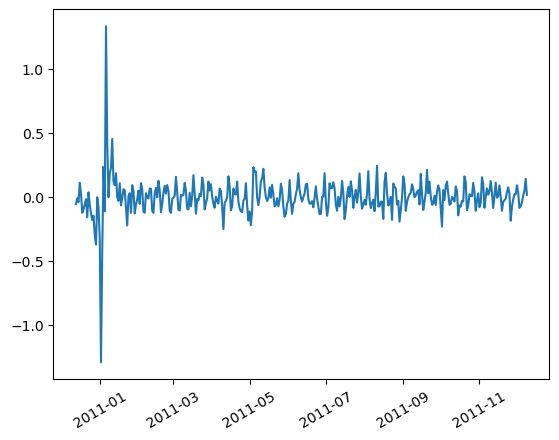

In [32]:
plt.plot(daily_rolling_log_diff)
plt.xticks(rotation=30)
plt.show()

In [33]:
result = adfuller(daily_rolling_log_diff)
print(f'P_value : {result[1]}')
if result[1] > 0.05:
    print('تست نشان میده که داده های مانا نیستند')
else:
    print('داده ها مانا هستند')

P_value : 1.2467849516786343e-10
داده ها مانا هستند


In [34]:
df_d = daily_rolling_log_diff

In [35]:
train_size = int(len(df_d) * 0.8)
train_d = df_d.iloc[:train_size]
test_d  = df_d.iloc[train_size:]

In [36]:
# param_grid = {
#     'p': [0, 1, 2],
#     'd': [0],
#     'q': [0, 1, 2],
#     'P': [0, 1],
#     'D': [0],
#     'Q': [0,1],
#     'm': [7] 
# }
# grid = ParameterGrid(param_grid)


# rmse_list = []

# for i in grid:
#     model_cv = ARIMA(order=(i['p'] , i['d'] , i['q']) , seasonal_order=(i['P'] , i['D'] , i['Q'] , i['m']))
    
#     CV = model_selection.RollingForecastCV(h = 4 , step=1 , initial = int(0.4 * len(train_d)))
    
#     cv_score = model_selection.cross_val_score(model_cv , 
#                                               y = train_d  ,
#                                               scoring='mean_squared_error'
#                                               ,cv=CV , error_score=1000000)
    
#     rmse = np.sqrt(np.average(cv_score))
#     rmse_list.append(rmse)

In [37]:
model = ARIMA(order=(2,0,1) , seasonal_order=(1,1,0,7)).fit(train_d)

prediction_daily = model.predict(int(len(df_d) * 0.2))
prediction_daily = prediction_daily.dropna()

In [38]:
df_test_d = pd.DataFrame({'test': test_d , 'pred': prediction_daily })
df_test_d.dropna(inplace=True)

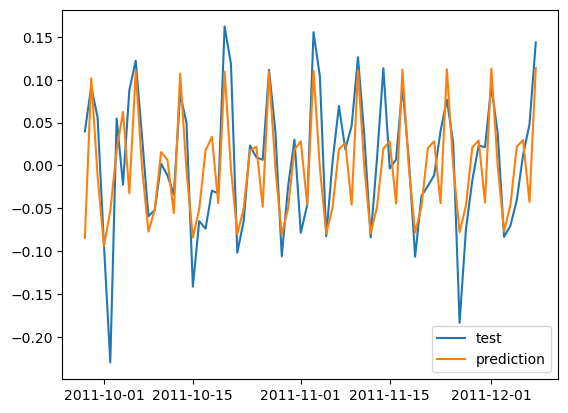

In [39]:
plt.plot(df_test_d['test'] ,label='test')
plt.plot(df_test_d['pred'] , label='prediction')
plt.legend()
plt.show()

In [40]:
print(f"MAE  : {mean_absolute_error(df_test_d['test'], df_test_d['pred'])}")
print(f"MSE  : {mean_squared_error(df_test_d['test'], df_test_d['pred'])}")
print(f"RMSE : {root_mean_squared_error(df_test_d['test'], df_test_d['pred'])}")
print(f"MAPE : {mean_absolute_percentage_error(df_test_d['test'], df_test_d['pred']):.2f}%")

MAE  : 0.04225011394655314
MSE  : 0.0031346843858728003
RMSE : 0.05598825221305627
MAPE : 1.50%


In [44]:
model_tuned_d = ARIMA(order=(1,0,0) , seasonal_order=(1,0,1,7)).fit(train_d)
prediction_daily_tuned = model_tuned_d.predict(int(len(df_d) * 0.2))
prediction_daily_tuned = prediction_daily_tuned.dropna()

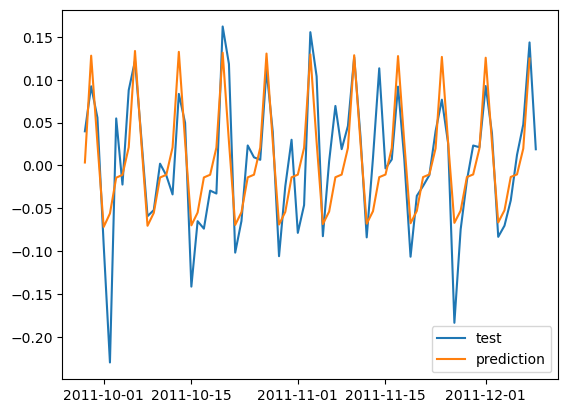

In [45]:
plt.plot(test_d , label='test')
plt.plot(prediction_daily_tuned , label='prediction')
plt.legend()
plt.show()

In [46]:
df_tuned_test = pd.DataFrame({'test': test_d , 'pred': prediction_daily_tuned })
df_tuned_test.dropna(inplace=True)

print(f"MAE  : {mean_absolute_error(df_tuned_test['test'], df_tuned_test['pred'])}")
print(f"MSE  : {mean_squared_error(df_tuned_test['test'], df_tuned_test['pred'])}")
print(f"RMSE : {root_mean_squared_error(df_tuned_test['test'], df_tuned_test['pred'])}")
print(f"MAPE : {mean_absolute_percentage_error(df_tuned_test['test'], df_tuned_test['pred']):.2f}%")

MAE  : 0.03388731269674192
MSE  : 0.0021288387273140507
RMSE : 0.04613934034329111
MAPE : 1.05%


In [47]:
residuals = model_tuned_d.resid()
fitted = model_tuned_d.fittedvalues()

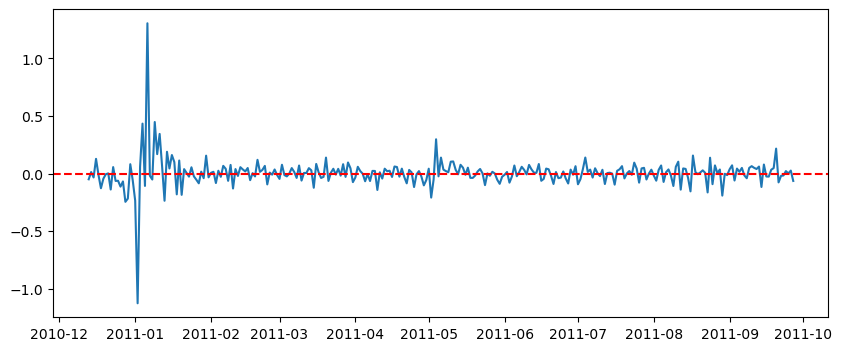

In [49]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, color='red', linestyle='--')
plt.show()

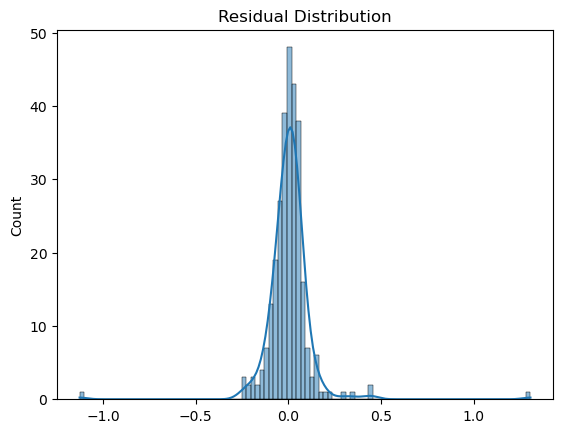

In [73]:
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()

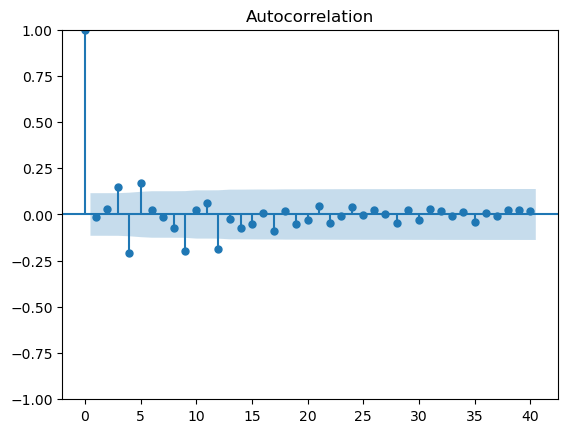

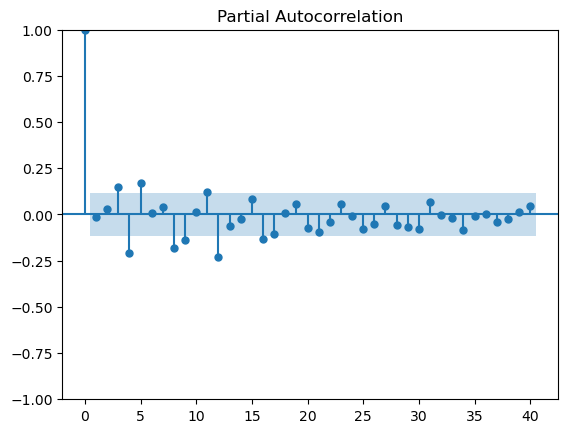

In [74]:
plot_acf(residuals, lags=40)
plot_pacf(residuals, lags=40)
plt.show()

In [75]:
lb_test = acorr_ljungbox(residuals)
print(lb_test)

      lb_stat  lb_pvalue
1    0.075688   0.783228
2    0.305932   0.858159
3    6.942802   0.073743
4   19.535103   0.000617
5   28.012753   0.000036
6   28.176237   0.000087
7   28.254573   0.000198
8   29.787789   0.000230
9   41.610580   0.000004
10  41.774370   0.000008


In [80]:
acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)


,lb_stat,lb_pvalue
10,41.774370,0.000008
20,59.900689,0.000007
30,63.147231,0.000377


In [91]:
auto_model = auto_arima(train_d, 
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    seasonal=True, m=7 ,
    start_P=0, start_Q=0,
    max_P=2, max_Q=3,
    information_criterion='aic',
    trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=-308.325, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=-259.730, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=-313.998, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=-311.805, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=-261.730, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=-293.629, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=-319.159, Time=0.52 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=-358.509, Time=0.74 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=-360.319, Time=0.29 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=-309.168, Time=0.07 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=-358.569, Time=0.71 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=-310.677, Time=0.20 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=-356.824, Time=0.91 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : 

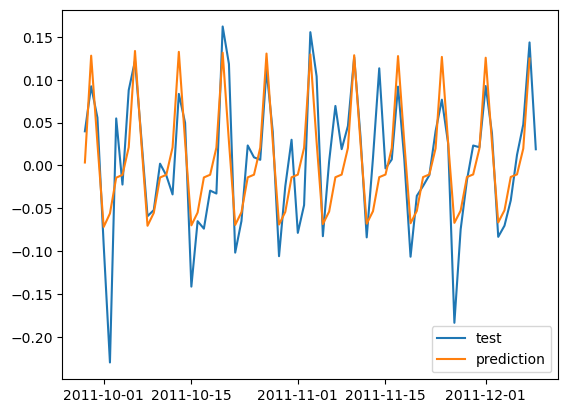

MAE  : 0.03388731269674192
MSE  : 0.0021288387273140507
RMSE : 0.04613934034329111
MAPE : 1.05%


In [93]:
better_model = ARIMA(order=(1,0,0) , seasonal_order=(1,0,1,7)).fit(train_d)
prediction_daily_tuned_3 = better_model.predict(int(len(df_d) * 0.2))
prediction_daily_tuned_3 = prediction_daily_tuned_2.dropna()


plt.plot(test_d , label='test')
plt.plot(prediction_daily_tuned_3 , label='prediction')
plt.legend()
plt.show()


print(f"MAE  : {mean_absolute_error(test_d[:72], prediction_daily_tuned_3)}")
print(f"MSE  : {mean_squared_error(test_d[:72], prediction_daily_tuned_3)}")
print(f"RMSE : {root_mean_squared_error(test_d[:72], prediction_daily_tuned_3)}")
print(f"MAPE : {mean_absolute_percentage_error(test_d[:72], prediction_daily_tuned_3):.2f}%")